<img src="rupixen-Q59HmzK38eQ-unsplash.jpg" alt="Someone is trying to purchase a produce online" width="500"/>

Online shopping decisions rely on how consumers engage with online store content. You work for a new startup company that has just launched a new online shopping website. The marketing team asks you, a new data scientist, to review a dataset of online shoppers' purchasing intentions gathered over the last year. Specifically, the team wants you to generate some insights into customer browsing behaviors in November and December, the busiest months for shoppers. You have decided to identify two groups of customers: those with a low purchase rate and returning customers. After identifying these groups, you want to determine the probability that any of these customers will make a purchase in a new marketing campaign to help gauge potential success for next year's sales.

### Data description:

You are given an `online_shopping_session_data.csv` that contains several columns about each shopping session. Each shopping session corresponded to a single user. 

|Column|Description|
|--------|-----------|
|`SessionID`|unique session ID|
|`Administrative`|number of pages visited related to the customer account|
|`Administrative_Duration`|total amount of time spent (in seconds) on administrative pages|
|`Informational`|number of pages visited related to the website and the company|
|`Informational_Duration`|total amount of time spent (in seconds) on informational pages|
|`ProductRelated`|number of pages visited related to available products|
|`ProductRelated_Duration`|total amount of time spent (in seconds) on product-related pages|
|`BounceRates`|average bounce rate of pages visited by the customer|
|`ExitRates`|average exit rate of pages visited by the customer|
|`PageValues`|average page value of pages visited by the customer|
|`SpecialDay`|closeness of the site visiting time to a specific special day|
|`Weekend`|indicator whether the session is on a weekend|
|`Month`|month of the session date|
|`CustomerType`|customer type|
|`Purchase`|class label whether the customer make a purchase|

In [37]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Load and view your data
shopping_data = pd.read_csv("online_shopping_session_data.csv")
shopping_data.head()

,SessionID,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Weekend,Month,CustomerType,Purchase
0,1,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,False,Feb,Returning_Customer,0.0
1,2,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,False,Feb,Returning_Customer,0.0
2,3,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,False,Feb,Returning_Customer,0.0
3,4,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,False,Feb,Returning_Customer,0.0
4,5,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,True,Feb,Returning_Customer,0.0


In [38]:
nov_dec=shopping_data[shopping_data['Month'].isin(['Nov','Dec'])]
nov_dec.head(10)

,SessionID,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Weekend,Month,CustomerType,Purchase
5463,5464,1,39.200000,2,120.800000,7,80.500000,0.000000,0.010000,0.000000,0.0,True,Nov,New_Customer,0.0
5464,5465,3,89.600000,0,0.000000,57,1721.906667,0.000000,0.005932,204.007949,0.0,True,Nov,Returning_Customer,1.0
5467,5468,4,204.200000,0,0.000000,31,652.376667,0.012121,0.016162,0.000000,0.0,False,Nov,Returning_Customer,0.0
5479,5480,0,0.000000,0,0.000000,13,710.066667,0.000000,0.007692,72.522838,0.0,False,Nov,Returning_Customer,1.0
5494,5495,0,0.000000,0,0.000000,24,968.692424,0.000000,0.000000,106.252517,0.0,False,Nov,Returning_Customer,1.0
5497,5498,13,1013.056909,2,102.800000,77,2697.022104,0.000000,0.009471,1.798670,0.0,False,Nov,Returning_Customer,0.0
5507,5508,1,86.600000,0,0.000000,14,349.576190,0.000000,0.004762,60.437378,0.0,False,Nov,New_Customer,1.0
5509,5510,6,545.650000,3,204.346667,69,1182.432333,0.000685,0.002998,19.715295,0.0,True,Nov,Returning_Customer,1.0
5510,5511,3,94.600000,0,0.000000,16,1254.000000,0.000000,0.019328,0.000000,0.0,True,Nov,New_Customer,0.0
5515,5516,6,82.140000,0,0.000000,12,191.100000,0.000000,0.012500,0.000000,0.0,False,Nov,Returning_Customer,0.0


In [39]:
#making sure we only have NOvember and december data
print(nov_dec['Month'].unique())

['Nov' 'Dec']


In [40]:
#get session frequency stats by customer type
count_session=nov_dec.groupby(['CustomerType'])['Purchase'].value_counts()
print(count_session)

CustomerType        Purchase
New_Customer        0.0          529
                    1.0          199
Returning_Customer  0.0         2994
                    1.0          728
Name: Purchase, dtype: int64


In [41]:
#total number of session by customer type
total_new_customer=np.sum(count_session['New_Customer'])
total_returning_customer=np.sum(count_session['Returning_Customer'])

In [42]:
#total number of purchase by customer type
purchase_new_Cust=count_session[('New_Customer',1)]
purchase_returning_customer=count_session[('Returning_Customer',1)]


In [43]:
#calculate purchase rates
purchase_rates_new=purchase_new_Cust/total_new_customer
purchase_rate_returning=purchase_returning_customer/total_returning_customer

In [44]:
# Therefore, the online purchase for the returing cusomter is lower than that of the new customers.
purchase_rates={"Returning_Customer": purchase_rate_returning,"New_Customer":purchase_rates_new}
print(purchase_rates)

{'Returning_Customer': 0.1955937667920473, 'New_Customer': 0.2733516483516483}


In [45]:
#lets identify teh strongest coorelation in total time spent between different types of pages visited by teh returning customers during the month of november and december
#lets calculate coorelation with Pandas

cor_admin_info=nov_dec['Administrative_Duration'].corr(nov_dec['Informational_Duration'])
cor_admin_product=nov_dec['Administrative_Duration'].corr(nov_dec['ProductRelated_Duration'])
cor_product_info=nov_dec['ProductRelated_Duration'].corr(nov_dec['Informational_Duration'])

print(cor_admin_info)
print(cor_admin_info)
print(cor_product_info)

0.24468855792839267
0.24468855792839267
0.36712552534442133


In [46]:
#Another way to solve this is use Scipy Pearsonr Function
#cor_admin_info=stats.pearsonr(nov_dec["Administrative_Duration"], nov_dec['Informational_Duration']

#another way to solve this is to use pandas coorelation matrix
#nov_dec[['Administrative_duration','Informational_Duration','ProductRelated_Duration']].corr()

In [47]:
#store Top Correlation
top_correlation={"pair":('Administrative_Duration','ProductRelated_Duration'),"correlation":cor_admin_product}
print(top_correlation)

{'pair': ('Administrative_Duration', 'ProductRelated_Duration'), 'correlation': 0.3898546003206963}


In [48]:
##A new campaign for the returning customers will boost the purchase rate by 15%
##what is the likelihood of achieving at lease 100 sales out of 500 online shopping session for the returning customers?

##purchase is a binomial random variable taking the value of either 0 or 1
#We know that the current purchase rate for the returning customers is
print("Current purchase rate for the returning customer:" , purchase_rate_returning)

Current purchase rate for the returning customer: 0.1955937667920473


In [49]:
#15% increase in thhis rate would be
increased_purchase_rate_returning=1.15 * purchase_rate_returning
print("Increased purchase rate for the returning customer:", increased_purchase_rate_returning)

Increased purchase rate for the returning customer: 0.22493283181085436


In [50]:
# The output is NaN because the argument names for stats.binom.cdf are incorrect.
# The correct argument order is (k, n, p), and the parameter for the number of successes is 'k' or 'x', not a keyword argument.
# The function should be called as stats.binom.cdf(100, 500, increased_purchase_rate_returning)
# Also, make sure that increased_purchase_rate_returning is a valid probability (between 0 and 1).

from scipy import stats

# Calculate the probability of having less than or equal to 100 sales out of 500 sessions
prob_sales_100_less = stats.binom.cdf(100, 500, increased_purchase_rate_returning)
prob_sales_100_less

0.0987778660962733

In [51]:
#the to find the probability of having 100 or more sales is 1-prob_sales_100_less

prob_atlest_100_sales=1-prob_sales_100_less
print("probability of having at least 100 sales: ", prob_atlest_100_sales)

probability of having at least 100 sales:  0.9012221339037267


In [ ]:
es

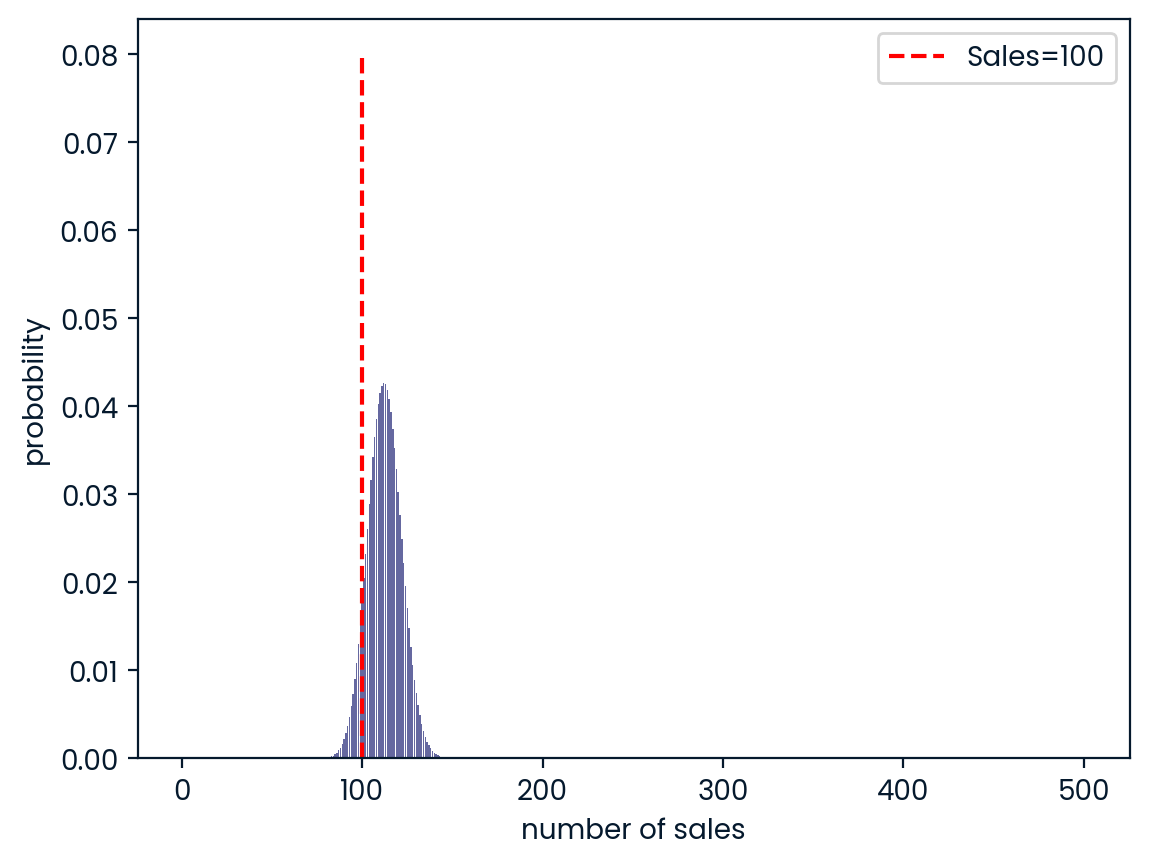

In [53]:
#Plotting the binomial Probability distributioni

n_sessions=500
k_values=np.arange(500)+1
p_binom_values=[stats.binom.pmf(k,n_sessions, increased_purchase_rate_returning) for k in k_values]
plt.bar(k_values,p_binom_values)
plt.vlines(100,0,0.08, color='r', linestyle='dashed',label='Sales=100')
plt.xlabel("number of sales")
plt.ylabel("probability")
plt.legend()
plt.show()

Explain the above binomial probability distribution chart 

The binomial probability distribution chart above visualizes the likelihood of achieving a certain number of sales out of 500 sessions, assuming a fixed probability of purchase per session (given by `increased_purchase_rate_returning`).

- The x-axis represents the number of sales ($k$), ranging from 1 to 500.
- The y-axis shows the probability of observing exactly $k$ sales in 500 sessions.
- Each bar corresponds to the probability $P(X = k)$, where $X$ is the number of sales.
- The red dashed vertical line at $k = 100$ highlights the threshold of 100 sales, which may be of particular interest for analysis (e.g., calculating the probability of achieving at least 100 sales).

This distribution helps in understanding how likely different sales outcomes are, given the session count and purchase probability. Most of the probability mass will be centered around the expected number of sales, with probabilities tapering off for much higher or lower sales counts.

what is the outcome or the results , and insights we can get from this analysis and chart?

### Insights and Outcomes from the Binomial Probability Distribution Analysis

From the binomial probability distribution chart and the analysis, we can derive several key outcomes and insights:

1. **Expected Number of Sales:**
   - The center of the distribution indicates the most likely number of sales out of 500 sessions, given the purchase probability. This helps set realistic expectations for sales performance.

2. **Probability of Achieving Sales Targets:**
   - By examining the probability mass to the right of a specific threshold (e.g., $k = 100$), we can estimate the likelihood of achieving or exceeding a sales goal. This is useful for goal-setting and performance evaluation.

3. **Variability and Risk:**
   - The spread of the distribution shows how much variability there is in the number of sales. A narrow distribution suggests consistent outcomes, while a wider one indicates more uncertainty and risk.

4. **Impact of Changing Purchase Probability:**
   - If the purchase probability increases or decreases, the distribution shifts accordingly. This allows us to model the impact of marketing efforts or website changes on expected sales.

5. **Decision-Making Support:**
   - The analysis provides a quantitative basis for making business decisions, such as resource allocation, inventory planning, and marketing strategies, based on the likelihood of different sales outcomes.

6. **Identifying Unusual Outcomes:**
   - Outcomes that fall in the tails of the distribution (very high or very low sales) are less likely. If such outcomes occur, they may warrant further investigation.

Overall, this analysis helps in understanding, predicting, and planning for sales performance under uncertainty, using a data-driven approach.